# Introduction 😃😃😃


## Texas Wind - Turbine 

#### About Dataset

###### Problem Statement:

 The intermittent nature and low control over the wind conditions bring up the same problem to every grid operator in their successful integration to satisfy current demand. In combination with having to predict demand and balance it with the supply, the grid operator now also must predict the availability of wind and solar generation plants in the next hour, day, or week. Apart from holding
back the benefits of renewable energy, incorrectly scheduling of wind generation plants may lead to unnecessary reservations, higher costs passed over to the consumer, and use of other more expensive and polluting power resources.
Working with real data is challenging due to noise and missing periods.

###### Dataset details:

The provided full-year hourly time-series are simulated using the National Renewable Energy Laboratory (NREL) software for a location in Texas, US. It has perfect data completeness, and no noisy data; challenges that hinder forecasting tasks with real datasets and distract from the goal.
The dataset contains various weather features which can be analyzed and used as predictors.

###### Colums:

- Time stamp
- System power generated | (kW)
- Wind speed | (m/s)
- Wind direction | (deg)
- Pressure | (atm)
- Air temperature | ('C)



# Work plan 🤝🤝🤝🤝🤝

- 1- Data Exploration & Analysis 🤝🤝🤝
- 2- Building a Machine Learning Model / Predict 


# Data Exploration & Analysis 🤝🤝🤝

In [1]:
#Importing the basic librarires fot analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("Solarize_Light2")  #using style ggplot

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import datetime as dt
import plotly.graph_objects as go
import plotly.express as px
import datetime as dt

In [2]:
#Importing the dataset
df =pd.read_csv("../input/texas-wind-turbine-dataset-simulated/TexasTurbine.csv")


# look the data set
df.head()

,Time stamp,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
0,"Jan 1, 12:00 am",1766.64,9.926,128,1.000480,18.263
1,"Jan 1, 01:00 am",1433.83,9.273,135,0.999790,18.363
2,"Jan 1, 02:00 am",1167.23,8.660,142,0.999592,18.663
3,"Jan 1, 03:00 am",1524.59,9.461,148,0.998309,18.763
4,"Jan 1, 04:00 am",1384.28,9.184,150,0.998507,18.963


In [3]:
# looking the shape DataSet
df.shape

(8760, 6)

In [4]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Time stamp                     8760 non-null   object 
 1   System power generated | (kW)  8760 non-null   float64
 2   Wind speed | (m/s)             8760 non-null   float64
 3   Wind direction | (deg)         8760 non-null   int64  
 4   Pressure | (atm)               8760 non-null   float64
 5   Air temperature | ('C)         8760 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 410.8+ KB


- We need convert data type column Timestamp from object to datetime

In [5]:
# convert data type column Timestamp from object to datetime

df['Time stamp'] = pd.to_datetime(df['Time stamp'], format='%b %d, %I:%M %p').dt.strftime('%b %d %H:%M:%S.%f')
# then use a lambda function to convert to datetime if it is a string else make is Not a Time
df['Time stamp'] = df['Time stamp'].apply(lambda x: dt.datetime.strptime(x,'%b %d %H:%M:%S.%f') if type(x)==str else pd.NaT)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Time stamp                     8760 non-null   datetime64[ns]
 1   System power generated | (kW)  8760 non-null   float64       
 2   Wind speed | (m/s)             8760 non-null   float64       
 3   Wind direction | (deg)         8760 non-null   int64         
 4   Pressure | (atm)               8760 non-null   float64       
 5   Air temperature | ('C)         8760 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 410.8 KB


In [7]:
# missing value

df.isnull().sum()

Time stamp                       0
System power generated | (kW)    0
Wind speed | (m/s)               0
Wind direction | (deg)           0
Pressure | (atm)                 0
Air temperature | ('C)           0
dtype: int64

- No any missing data

In [8]:
# check if any duplicate value

df.duplicated().sum()

0

- No duplicate

In [9]:
# look  describe data set
df.describe().round(2)

,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
count,8760.00,8760.00,8760.00,8760.00,8760.00
mean,964.47,7.38,146.62,0.99,22.15
std,878.56,3.14,84.68,0.01,4.86
min,0.00,0.12,0.00,0.97,3.26
25%,215.95,5.12,99.00,0.99,19.46
50%,693.97,7.34,135.00,0.99,22.76
75%,1562.29,9.60,169.00,1.00,26.06
max,3004.01,19.74,360.00,1.01,32.96


In [10]:
# add column Month 

df["Month"]=df["Time stamp"].dt.month

In [11]:
df.head()

,Time stamp,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C),Month
0,1900-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1
1,1900-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1
2,1900-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1
3,1900-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1
4,1900-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1


## Visualizations


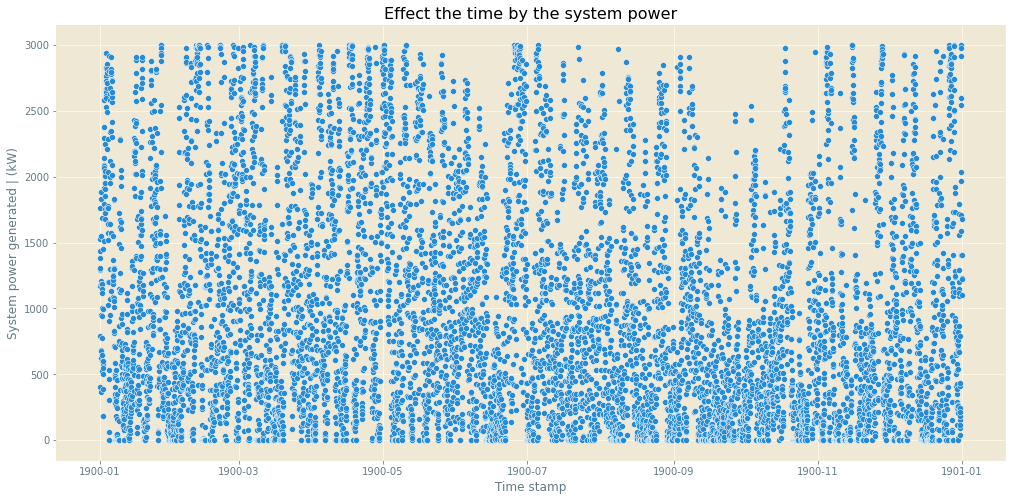

In [12]:
# the graph show effect the time by the system power

plt.figure(figsize=(17,8))
sns.scatterplot(data=df,x="Time stamp",y="System power generated | (kW)",)
plt.title("Effect the time by the system power")
plt.show()

- Through the year- we see not different System power generated - all the months the same

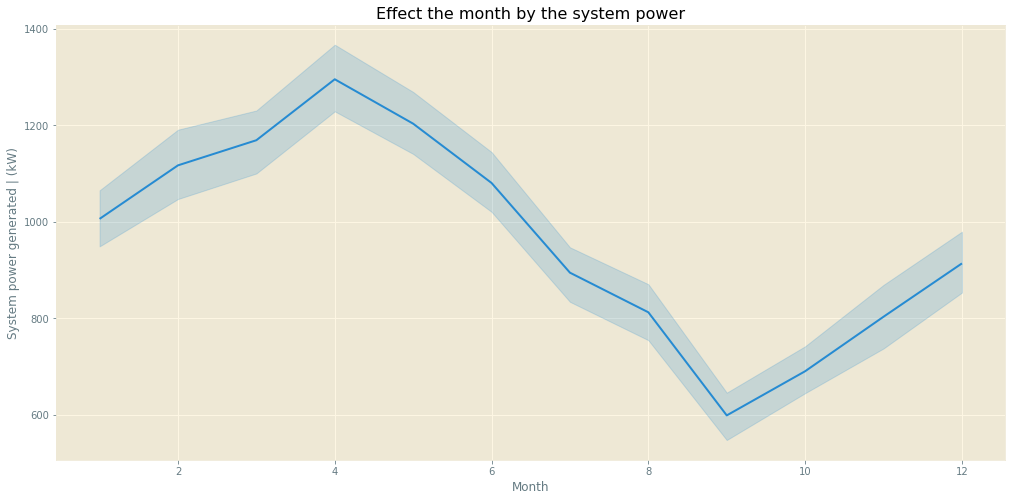

In [13]:
# the graph show effect the month by the system power

plt.figure(figsize=(17,8))
sns.lineplot(data=df,x="Month",y="System power generated | (kW)",)
plt.title("Effect the month by the system power")
plt.show()

- The high average System power generated in April and the less in September

- 

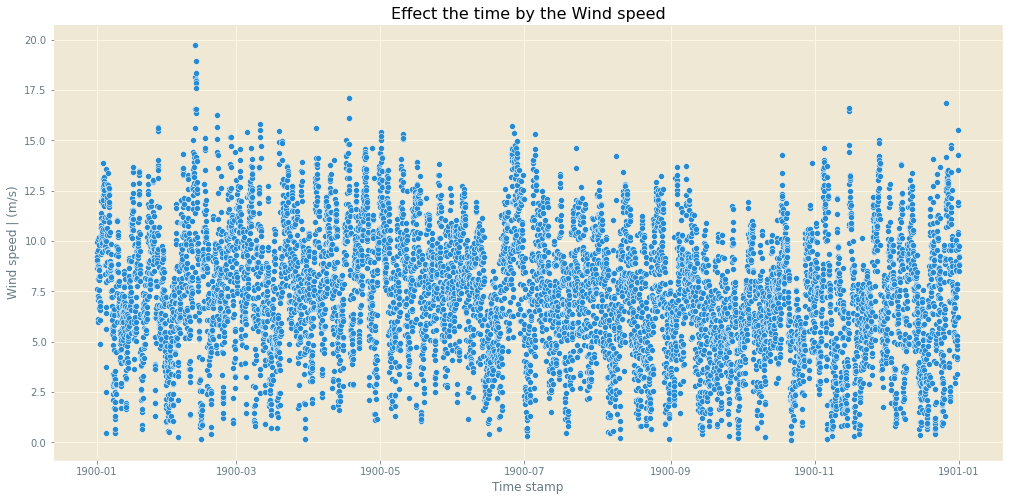

In [14]:
# the graph show effect the time by the Wind speed

plt.figure(figsize=(17,8))
sns.scatterplot(data=df,x="Time stamp",y="Wind speed | (m/s)",)
plt.title("Effect the time by the Wind speed")
plt.show()

- Wind speed the same all months

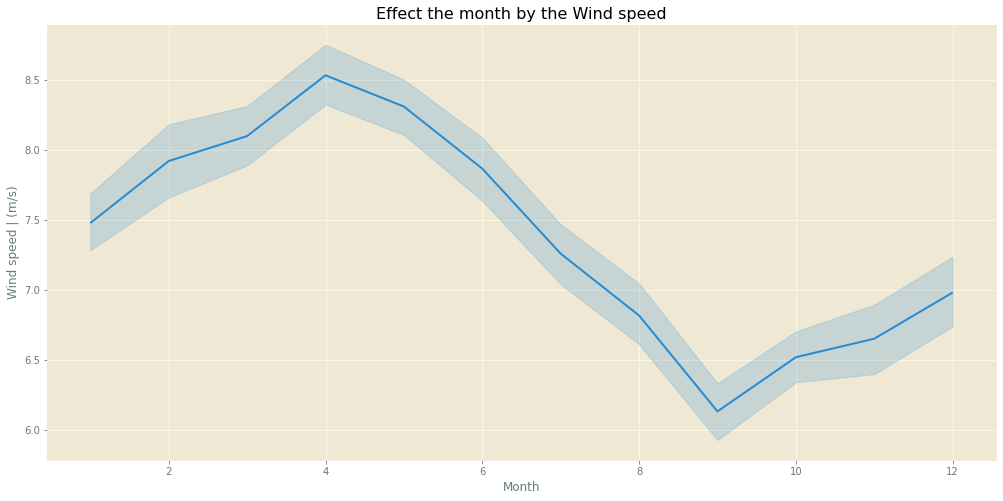

In [15]:
# the graph show effect the month by the Wind speed

plt.figure(figsize=(17,8))
sns.lineplot(data=df,x="Month",y="Wind speed | (m/s)")
plt.title("Effect the month by the Wind speed")
plt.show()

- The high average Wind speed in April and the less in September

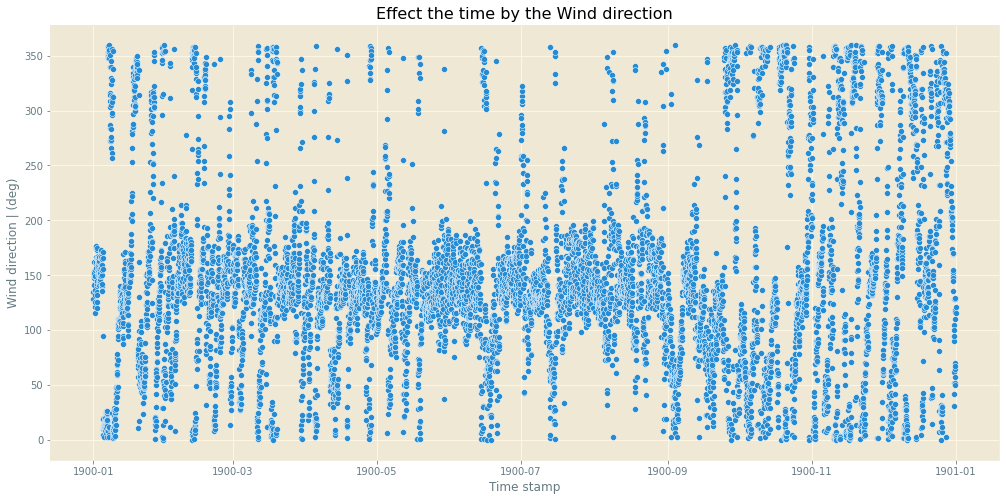

In [16]:
# the graph show effect the time by Wind direction

plt.figure(figsize=(17,8))
sns.scatterplot(data=df,x="Time stamp",y="Wind direction | (deg)",)
plt.title("Effect the time by the Wind direction")
plt.show()

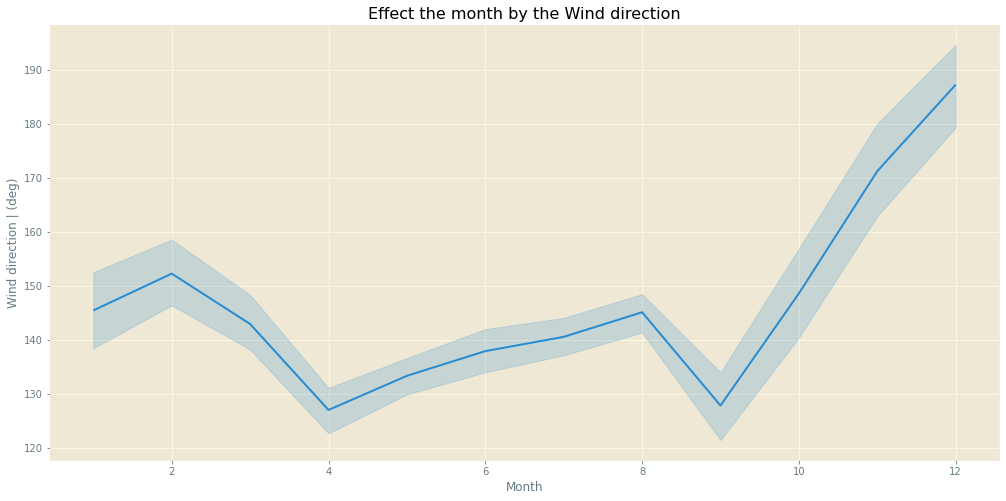

In [17]:
# the graph show effect the month by the Wind direction

plt.figure(figsize=(17,8))
sns.lineplot(data=df,x="Month",y="Wind direction | (deg)",)
plt.title("Effect the month by the Wind direction")
plt.show()

- The high average Wind direction in December and the less in April and August

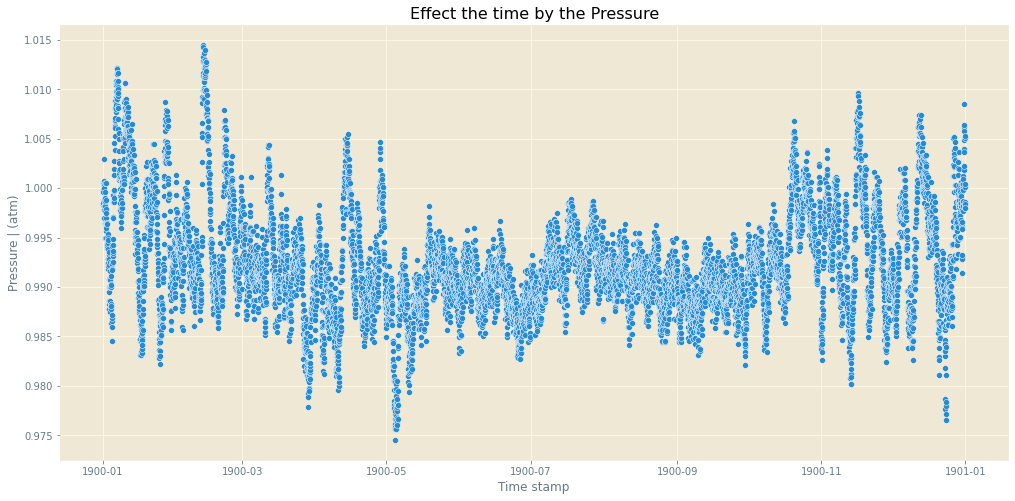

In [18]:
# the graph show effect the time by the Pressure

plt.figure(figsize=(17,8))
sns.scatterplot(data=df,x="Time stamp",y="Pressure | (atm)")
plt.title("Effect the time by the Pressure")
plt.show()

- The Pressure stable between May to october and anther months it is an fluctuate

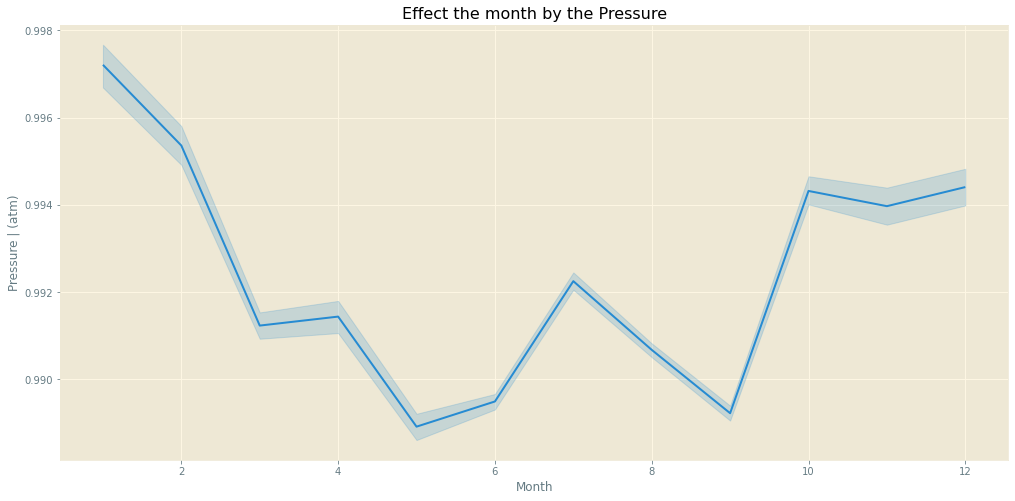

In [19]:
# the graph show effect the month by the Pressure

plt.figure(figsize=(17,8))
sns.lineplot(data=df,x="Month",y="Pressure | (atm)",)
plt.title("Effect the month by the Pressure")
plt.show()

- The high average Pressure in January and the less from April to September

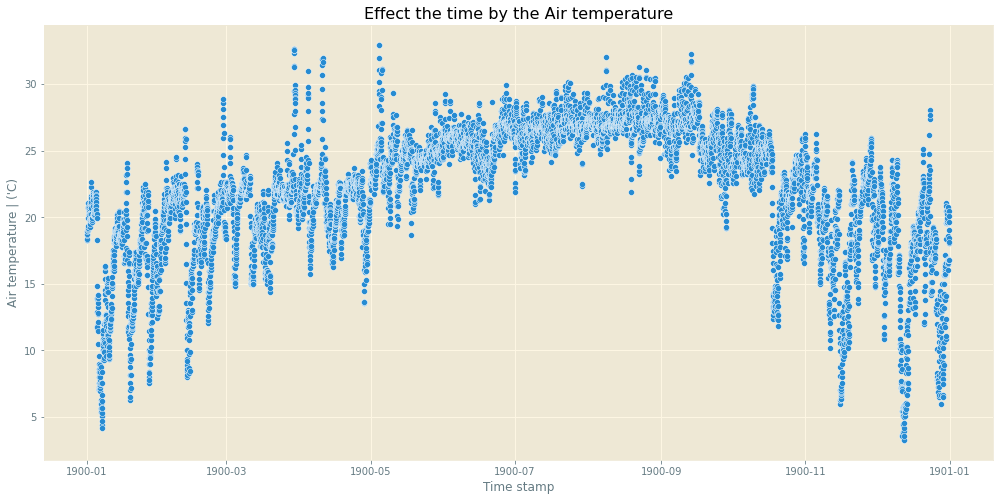

In [20]:
# the graph show effect the time by the Air temperature

plt.figure(figsize=(17,8))
sns.scatterplot(data=df,x="Time stamp",y="Air temperature | ('C)")
plt.title("Effect the time by the Air temperature")
plt.show()

- Sure the summer season that high temperature - From May th October

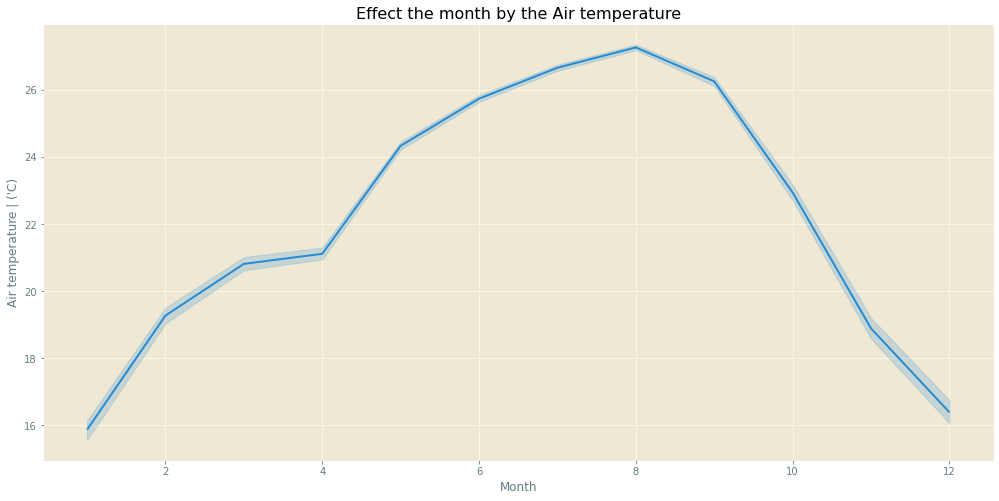

In [21]:
# the graph show effect the month by the Air temperature

plt.figure(figsize=(17,8))
sns.lineplot(data=df,x="Month",y="Air temperature | ('C)",)
plt.title("Effect the month by the Air temperature")
plt.show()

# Analysis Results
 - After made some visualizations I have some results:

### System power generated
- Through the year- we see not different System power generated - all the months the same.
- The high average System power generated in April and the less in September.


### Wind speed

- Wind speed the same all months.
- The high average Wind speed in April and the less in September.


### Wind direction

- The high average Wind direction in December and the less in April and August.

### The Pressure

- The Pressure stable between May to october and anther months it is an fluctuate.
- The high average Pressure in January and the less from April to September.

### The temperature
- Sure the summer season that high temperature - From May th October.




# 2- Building a Machine Learning Model - Regression 🙄🙄🙄

# Prediction - System power generated | (kW)



In [22]:
#Importing the basic librarires for building model


from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler ,PolynomialFeatures,minmax_scale,MaxAbsScaler ,LabelEncoder,MinMaxScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.svm import SVR
from xgboost import XGBRegressor

In [23]:
df.set_index("Time stamp",inplace=True)

In [24]:
df.head()

,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C),Month
Time stamp,,,,,,
1900-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1
1900-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1
1900-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1
1900-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1
1900-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1


In [25]:
#Defined X value and y value , and split the data train
X = df.drop(columns="System power generated | (kW)")           
y = df["System power generated | (kW)"]    # y = system power generated 

# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (6132, 5)
X Test  :  (2628, 5)
Y Train :  (6132,)
Y Test  :  (2628,)


In [26]:
#Defined object from library Regression 

LR = LinearRegression()
DTR = DecisionTreeRegressor()
RFR = RandomForestRegressor()
KNR = KNeighborsRegressor()
MLP = MLPRegressor()
XGB = XGBRegressor()
SVR = SVR()

In [27]:
# make for loop for Regression 

li = [LR,DTR,RFR,KNR,KNR,XGB,SVR]
d = {}
for i in li:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,":",r2_score(y_test,ypred)*100)
    d.update({str(i):i.score(X_test,y_test)*100})

LinearRegression() : 91.15180354603353
DecisionTreeRegressor() : 99.98813861966845
RandomForestRegressor() : 99.99587340065804
KNeighborsRegressor() : 93.4547729570837
KNeighborsRegressor() : 93.4547729570837
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...) : 99.9964483075646
SVR() : -6.190233934681544


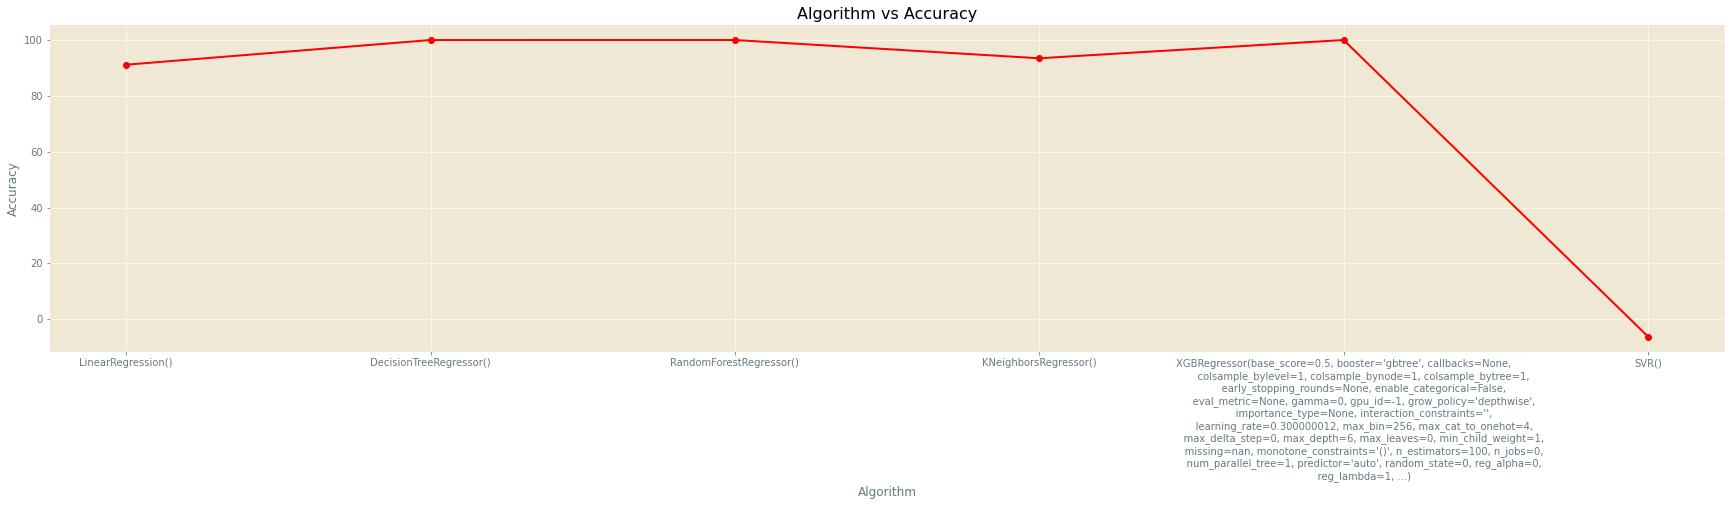

In [28]:
# make graph about Accuracy

plt.figure(figsize=(30, 6))
plt.title("Algorithm vs Accuracy")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(d.keys(),d.values(),marker='o',color='red')
plt.show()

# Model Selection Results 😃😃😃


- LinearRegression --> 91.1
- DecisionTreeRegressor --> 99.9
- RandomForestRegressor --> 99.9
- KNeighborsRegressor -->93.4
- KNeighborsRegressor -->93.4
- XGBRegressor -->99.9



# Notes 😃😃😃😃

- Thank for reading my analysis and my regression. 😃😃😃😃

- If you any questions or advice me please write in the comment . ❤️❤️❤️❤️

- If anyone has a model with a higher percentage, please tell me 🤝🤝🤝


# Vote ❤️😃

- If you liked my work upvote me ,


# The End 🤝🎉🤝🎉